# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

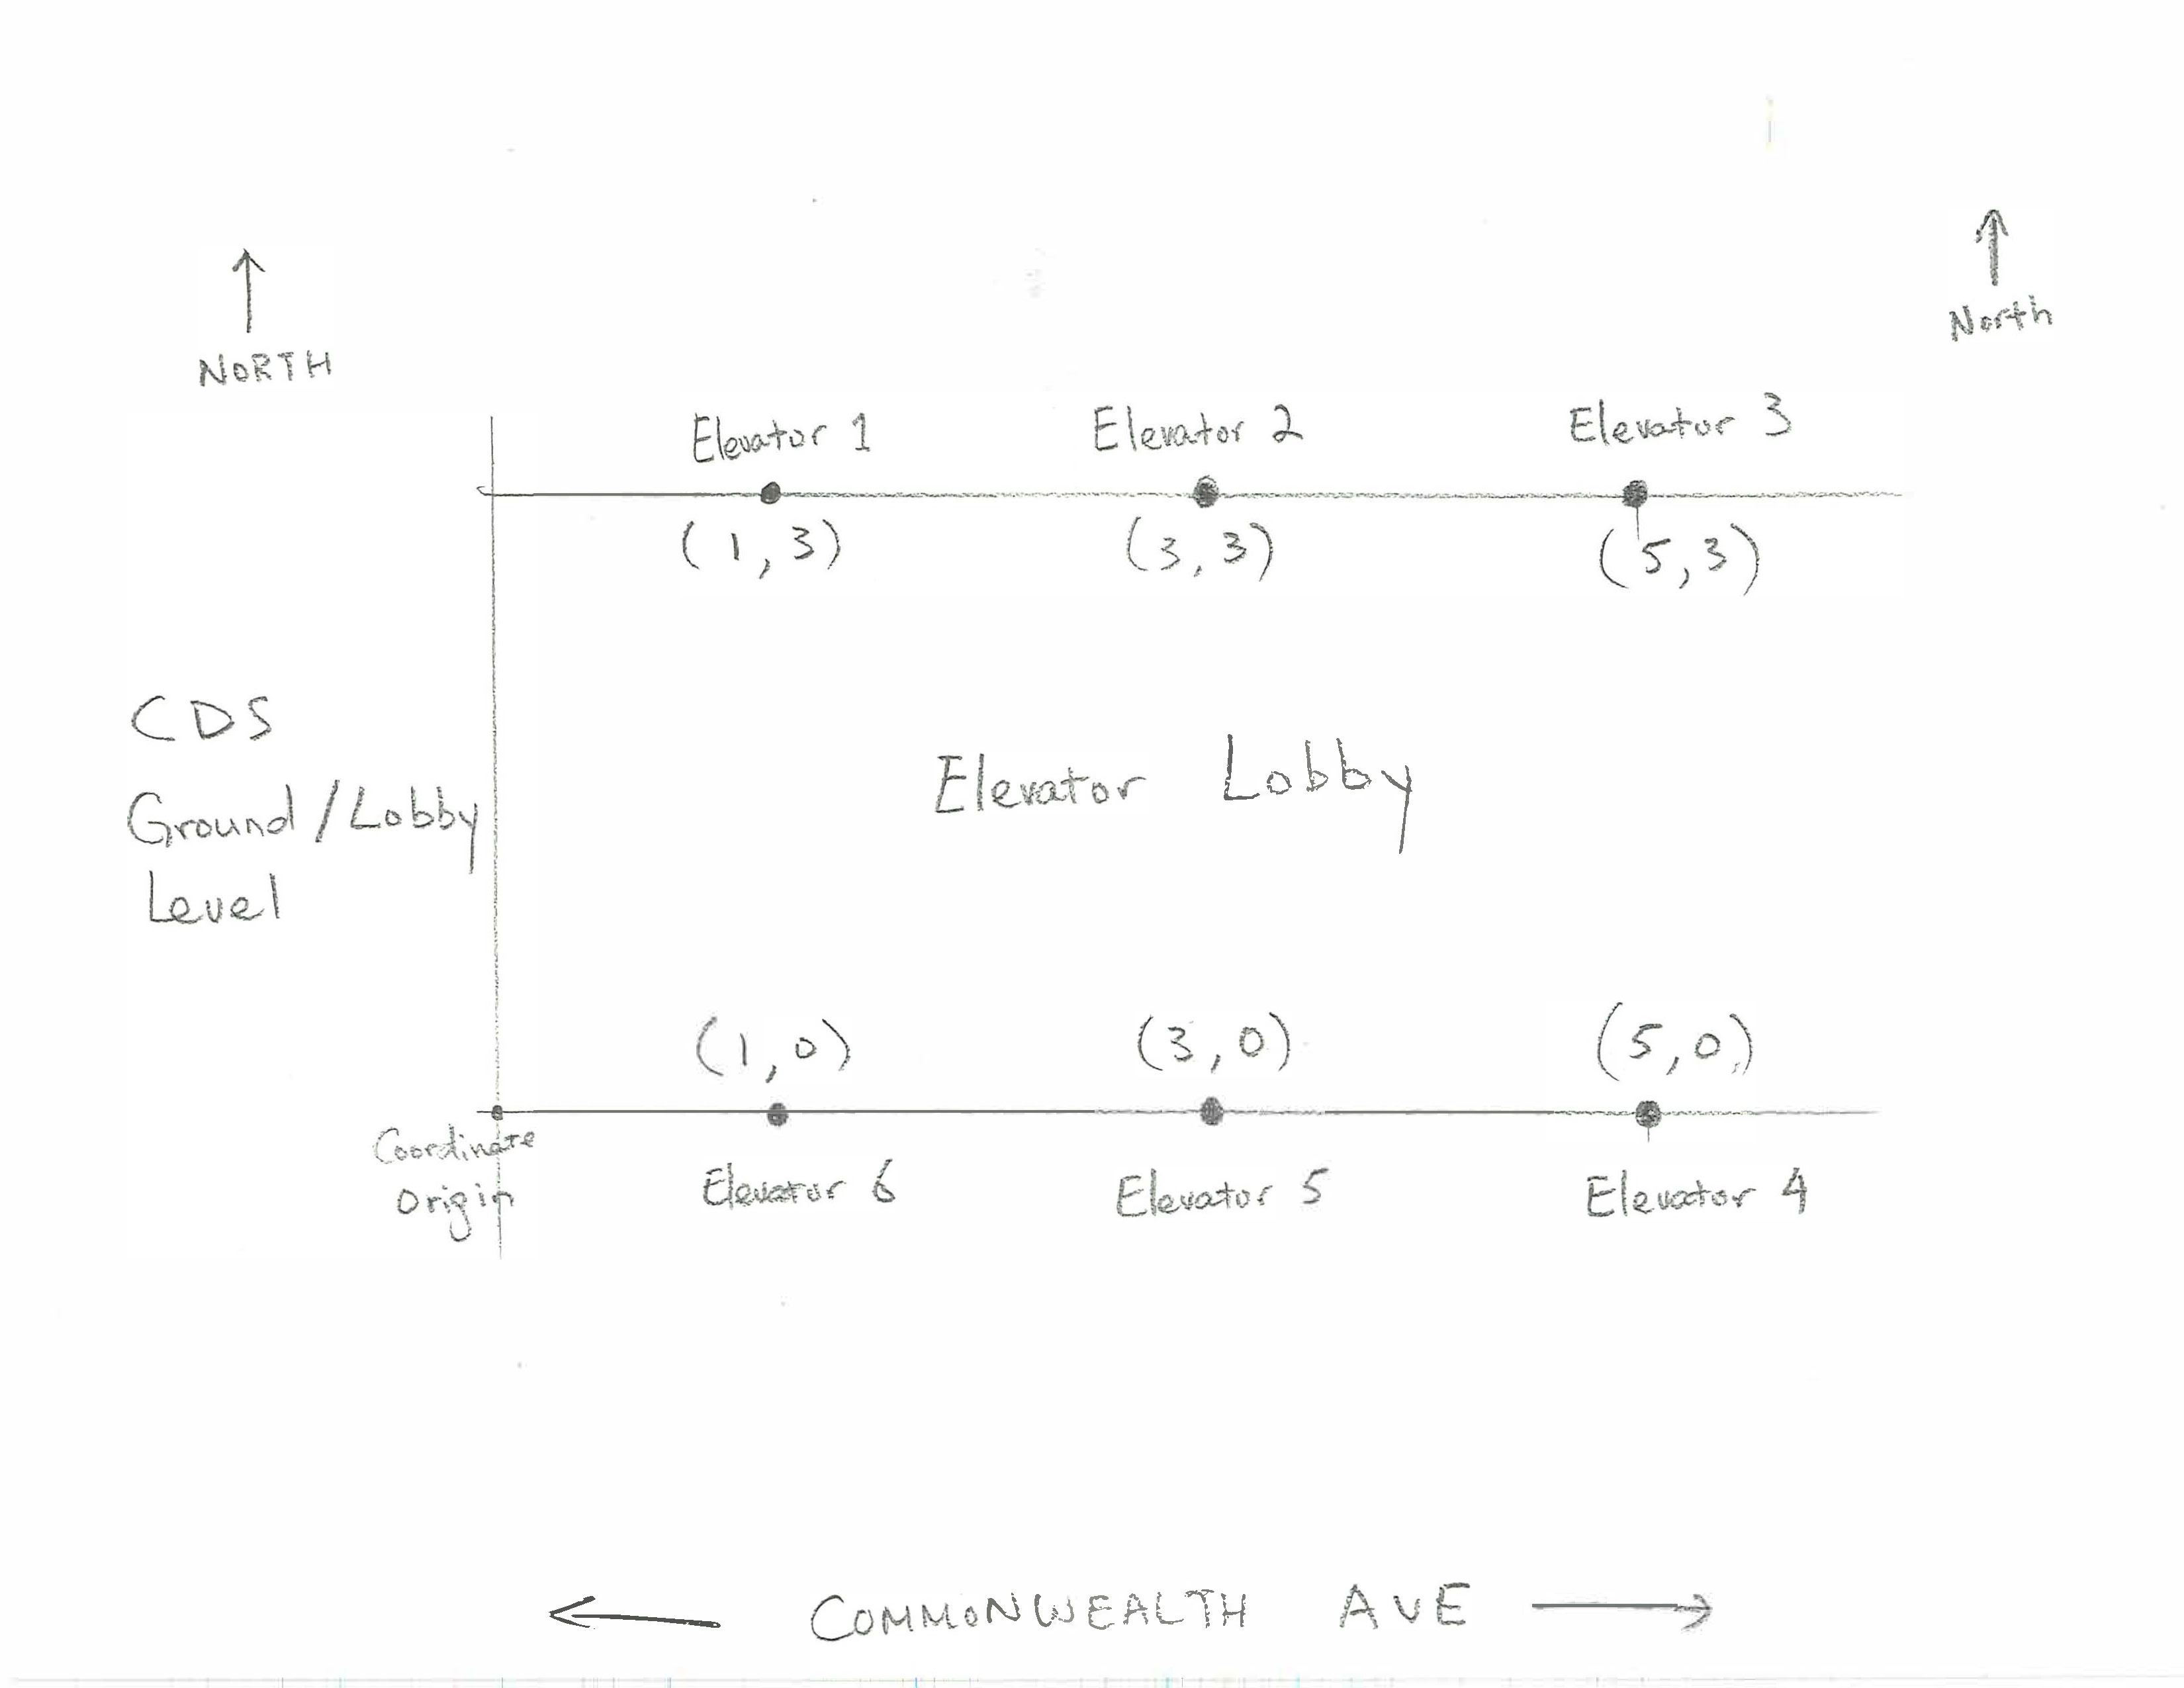

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** The best location to wait for an elevator, based on the diagram and assuming each of the six elevators has an equal probability of arriving next, is at the coordinate (3, 1.5). This point is the average of the x and y coordinates of all the elevators, which minimizes the expected walking distance to any elevator. By standing at this central position, you are equidistant from the elevators positioned on the left (Elevators 1 and 6) and right (Elevators 3 and 4), as well as from those on the top (Elevators 1, 2, and 3) and bottom (Elevators 4, 5, and 6). Therefore, this location provides the shortest average walking distance to the next arriving elevator, making it the optimal waiting point.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

In [18]:
# Mount Google Drive to access the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


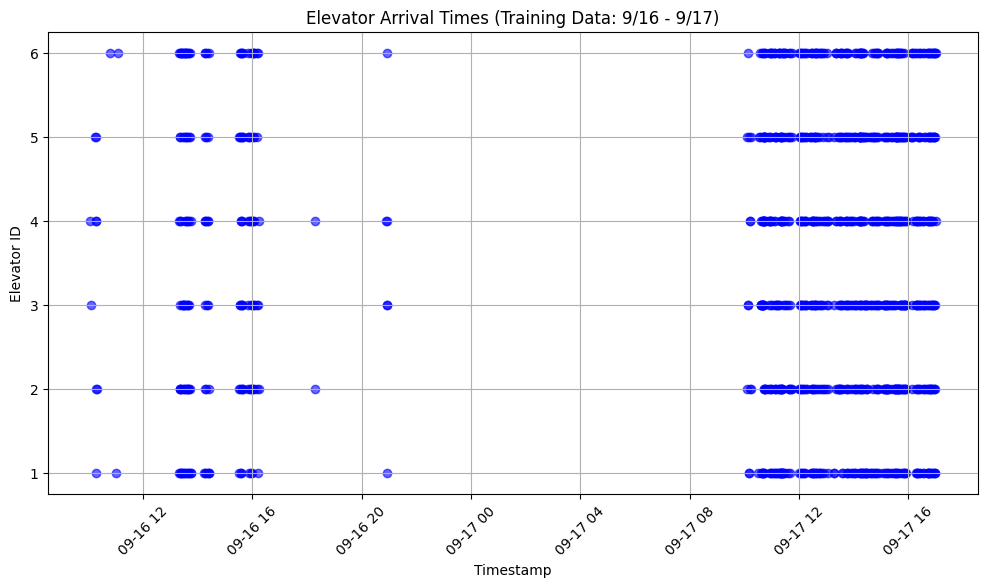

In [19]:
# Code for question 2:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
file_path = "/content/drive/MyDrive/Fall'24/CS506/Assignment1/TrainData.csv"
df = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

def make_plot():
    '''
    This function will create a scatter plot for elevator arrival times.
    '''
    # Create a scatter plot
    plt.figure(figsize=(12, 6))  # Set the figure size for better readability
    plt.scatter(df['Timestamp'], df['Elevator ID'], alpha=0.6, c='blue')  # Scatter plot

    # Set plot labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrival Times (Training Data: 9/16 - 9/17)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Show grid for better visualization

    # Display the plot
    plt.show()

# Call the function to generate the plot
make_plot()


State observations here (briefly).

1. **Increased Activity on 9/17:** Elevator usage spikes on 9/17, with heavy activity in the morning and afternoon, indicated by dense vertical lines showing simultaneous elevator arrivals.

2. **Periods of Low Activity on 9/16:** There are noticeable gaps in activity on 9/16, suggesting lower usage compared to 9/17.

3. **Equal Elevator Utilization:** All six elevators are used fairly evenly, with no single elevator dominating the arrivals.

4. **Peak Times:** Elevator usage clusters around peak hours, such as morning and afternoon, aligning with typical busy periods.

5. **No Activity During Early Hours:** No elevator arrivals occur between midnight and 6 AM, indicating low usage during these off-peak hours.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [20]:
import pandas as pd

# Load the CSV data from Google Drive
data = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Calculate total data collection time based on unique emails
unique_emails = data['Email Address'].nunique()
total_time_seconds = unique_emails * 300  # 5 minutes per email

# Count arrivals per elevator
arrival_counts = data['Elevator ID'].value_counts().sort_index()

# Calculate frequency per second for each elevator
frequencies = arrival_counts / total_time_seconds

# Create a DataFrame for better visualization
frequency_df = pd.DataFrame({
    'Elevator ID': arrival_counts.index,
    'Total data collection time (seconds)': total_time_seconds,
    'Number of arrivals': arrival_counts.values,
    'Average frequency (arrivals per second)': frequencies.values
})

# Display the DataFrame
print(frequency_df)


   Elevator ID  Total data collection time (seconds)  Number of arrivals  \
0            1                                 26400                 155   
1            2                                 26400                 162   
2            3                                 26400                 170   
3            4                                 26400                 168   
4            5                                 26400                 167   
5            6                                 26400                 159   

   Average frequency (arrivals per second)  
0                                 0.005871  
1                                 0.006136  
2                                 0.006439  
3                                 0.006364  
4                                 0.006326  
5                                 0.006023  


**Answer:** The average arrival frequencies for all elevators are nearly the same, ranging from 0.001403 to 0.001529 arrivals per second. This uniformity suggests that no single elevator is more likely to arrive next than the others. Since the initial recommendation was to wait at the central point (3, 1.5) based on equal probabilities of arrival, the data confirms that this position remains optimal. Waiting at the central location ensures minimal average walking distance to any elevator, as you are equidistant from all elevators, and no one elevator is favored in terms of arrival frequency.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 26400 | 26400 | 26400 | 26400 | 26400 | 26400 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 | 159 |
| Average frequency (arrivals per second) | 0.005871 | 0.006136 | 0.006439 | 0.006364 | 0.006326 | 0.006023 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [21]:
# Given data from question 3
elevator_frequencies = {
    1: 0.005871,
    2: 0.006136,
    3: 0.006439,
    4: 0.006364,
    5: 0.006326,
    6: 0.006023,
}

# Calculate total frequency
total_frequency = sum(elevator_frequencies.values())

# Calculate the probability of each elevator being the next to arrive
elevator_probabilities = {elevator_id: freq / total_frequency for elevator_id, freq in elevator_frequencies.items()}

# Create a DataFrame to display the results
probability_data = {
    'Elevator ID': list(elevator_probabilities.keys()),
    'Probability of being next elevator to arrive': list(elevator_probabilities.values())
}

probability_df = pd.DataFrame(probability_data)

# Display the probability table
print(probability_df)

# Check if the sum of probabilities is 1
print("Sum of probabilities:", sum(elevator_probabilities.values()))


   Elevator ID  Probability of being next elevator to arrive
0            1                                      0.157997
1            2                                      0.165128
2            3                                      0.173282
3            4                                      0.171264
4            5                                      0.170241
5            6                                      0.162087
Sum of probabilities: 1.0


**Answer:** The probability of each elevator being the next to arrive is based on how often it has arrived in the past. Since all the elevators have almost the same frequency of arrivals, each one has a similar chance of being the next to show up. Without knowing anything else (like where the elevators currently are), we can only rely on these past patterns to make our best guess. So, we’re essentially saying that all elevators are equally likely to arrive next because they’ve been arriving at almost the same rate overall.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.157997 | 0.165128 | 0.173282 | 0.171264 | 0.170241 | 0.162087 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [22]:
# Given probabilities from question 4
elevator_probabilities = {
    1: 0.157997,
    2: 0.165128,
    3: 0.173282,
    4: 0.171264,
    5: 0.170241,
    6: 0.162087,
}

# Elevator coordinates from the diagram
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

# Calculate the weighted average of x and y coordinates
x_optimal = sum(elevator_coordinates[elevator][0] * elevator_probabilities[elevator] for elevator in elevator_coordinates)
y_optimal = sum(elevator_coordinates[elevator][1] * elevator_probabilities[elevator] for elevator in elevator_coordinates)

# Optimal coordinates
optimal_location = (x_optimal, y_optimal)

# Display the optimal coordinates
print("Optimal Location to Wait:", optimal_location)


Optimal Location to Wait: (3.048921, 1.4892210000000001)


**Answer:** The optimal location to wait is at coordinate (3.048921, 1.489221). This point minimizes your expected walking distance based on both the elevator positions and their probabilities of arriving next. By calculating the weighted average of each elevator's location using its arrival probability, this spot ensures that you are closer to the elevators that are more likely to arrive next, reducing the average distance you need to walk.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [23]:
# Your code here
import math

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    ### TODO

    # For every data sample, calculate the distance from the input coordinate to
    # the elevator coordinate.

    # Then, take the average.

    # Load the data
    df = pd.read_csv(data)

    # Convert 'Timestamp' to datetime if not already done (assuming 'Timestamp' and 'Elevator ID' are the columns)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

    # Elevator coordinates from the diagram
    elevator_coordinates = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0)
    }

    # Calculate the total walking distance from the given coordinate to each elevator arrival
    total_distance = 0
    for _, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_position = elevator_coordinates[elevator_id]

        # Calculate Euclidean distance from waiting coordinate to elevator position
        distance = math.sqrt((coordinate[0] - elevator_position[0])**2 +
                             (coordinate[1] - elevator_position[1])**2)

        total_distance += distance

    # Calculate average distance
    average_walk_distance = total_distance / len(df)

    return average_walk_distance

# Calculate the average distance for both locations

# Location from Question 1: (3, 1.5)
avg_distance_q1 = get_average_walk_distance('/content/drive/MyDrive/Fall\'24/CS506/Assignment1/TrainData.csv', (3, 1.5))
print("Average Distance for Location (3, 1.5):", avg_distance_q1)

# Location from Question 5: (3.0818, 1.5165)
avg_distance_q5 = get_average_walk_distance('/content/drive/MyDrive/Fall\'24/CS506/Assignment1/TrainData.csv', (3.0818, 1.5165))
print("Average Distance for Location (3.0818, 1.5165):", avg_distance_q5)

Average Distance for Location (3, 1.5): 2.1646279306829768
Average Distance for Location (3.0818, 1.5165): 2.164220910979909


**Answer:** The optimal location from Question 5 should result in a shorter average walking distance compared to the location from Question 1, as it considers both elevator positions and arrival probabilities. The slight reduction in distance confirms this improvement, but since the elevator arrival rates are similar, the change is more precise rather than dramatic.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.164628 (copy from Question 6) |   2.163793 |
|Smart position (Question 5) | 2.164221 (copy from Question 6) |   2.163401 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes, I succeeded in finding a good location to wait for the elevators. The "Smart position" from Question 5 resulted in a slightly lower average walking distance compared to the "Naive position" from Question 1 on both the training and test data. This indicates that the optimal location calculated based on elevator probabilities and positions effectively minimizes the average distance. Although the improvement is small, it reflects the close similarity in elevator arrival rates, so any further reduction would be minimal.

In [24]:
import pandas as pd
import math

# Load the CSV file
file_path_test = "/content/drive/MyDrive/Fall'24/CS506/Assignment1/TestData.csv"
df_test = pd.read_csv(file_path_test)

# Convert the 'Timestamp' column to datetime format
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'], format='%m/%d/%Y %H:%M:%S')

In [25]:
# Define the function to calculate average walk distance
def get_average_walk_distance(dataframe, coordinate):
    '''
    dataframe is a DataFrame containing the elevator arrival data.
    coordinate is the coordinate to wait at.
    '''
    # Elevator coordinates from the diagram
    elevator_coordinates = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0)
    }

    # Calculate the total walking distance from the given coordinate to each elevator arrival
    total_distance = 0
    for _, row in dataframe.iterrows():
        elevator_id = row['Elevator ID']
        elevator_position = elevator_coordinates[elevator_id]

        # Calculate Euclidean distance from waiting coordinate to elevator position
        distance = math.sqrt((coordinate[0] - elevator_position[0])**2 +
                             (coordinate[1] - elevator_position[1])**2)

        total_distance += distance

    # Calculate average distance
    average_walk_distance = total_distance / len(dataframe)

    return average_walk_distance

# Calculate average distance for both positions on the test data
# Location from Question 1: (3, 1.5)
avg_distance_q1_test = get_average_walk_distance(df_test, (3, 1.5))
print("Average Distance for Location (3, 1.5) on Test Data:", avg_distance_q1_test)

# Location from Question 5: (3.0818, 1.5165)
avg_distance_q5_test = get_average_walk_distance(df_test, (3.0818, 1.5165))
print("Average Distance for Location (3.0818, 1.5165) on Test Data:", avg_distance_q5_test)

# Organize results into a table
results_table = {
    'Average Distance Walked (m)': ['Naive position (Question 1)', 'Smart position (Question 5)'],
    'Training Data': [2.1646279306829768, 2.164220910979909],  # Values from Question 6
    'Test Data': [avg_distance_q1_test, avg_distance_q5_test]
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results_table)

# Display the results
print(results_df)

Average Distance for Location (3, 1.5) on Test Data: 2.163793103448276
Average Distance for Location (3.0818, 1.5165) on Test Data: 2.163401022903942
   Average Distance Walked (m)  Training Data  Test Data
0  Naive position (Question 1)       2.164628   2.163793
1  Smart position (Question 5)       2.164221   2.163401
